✅ Dataset loaded successfully

First 5 rows:
      video_id                                              title  \
0  kZfz5UlsHlQ                        DARLING, I (Official Video)   
1  9txkGBj_trg  Call of Duty: Black Ops 7 | Gameplay Reveal Tr...   
2  HVC_dBNUZGc                   gamescom Opening Night Live 2025   
3  5dA094oAy-g     Twenty One Pilots - Drum Show (Official Video)   
4  NZY5WiqeyQQ  Fallout Season 2 - Official Teaser Trailer | g...   

                                         description          published_at  \
0  directed by TYLER OKONMA\ndp: LUIS "PANCH" PER...  2025-08-19T17:09:11Z   
1  Call of Duty®: Black Ops 7 redefines the franc...  2025-08-19T18:08:38Z   
2  Live from Cologne – the big opening show of ga...  2025-08-19T20:15:33Z   
3  Official video for the new single “Drum Show” ...  2025-08-18T17:30:06Z   
4  Watch the Season 2 Teaser Trailer for Fallout,...  2025-08-19T18:55:58Z   

                 channel_id       channel_title  \
0  UCsQBsZJltmLzlsJN

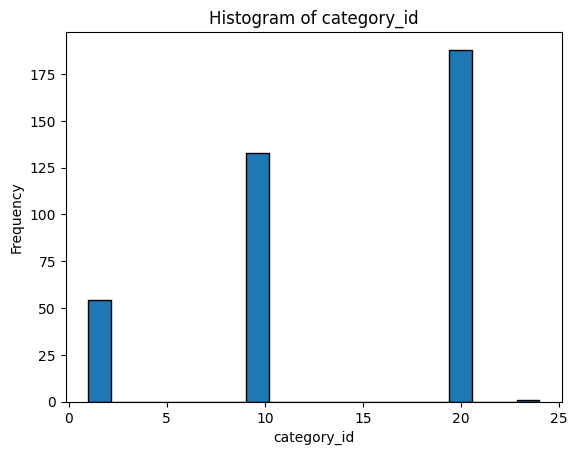

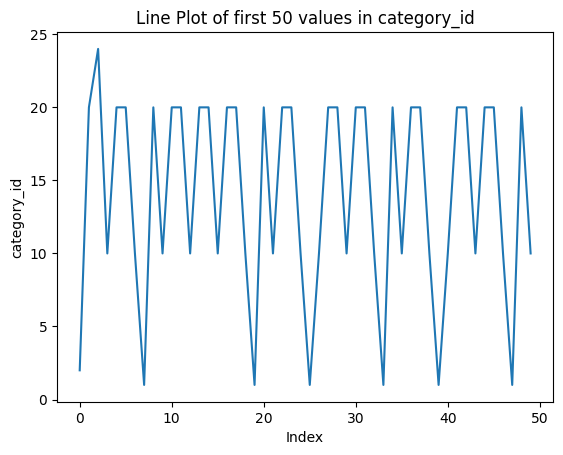

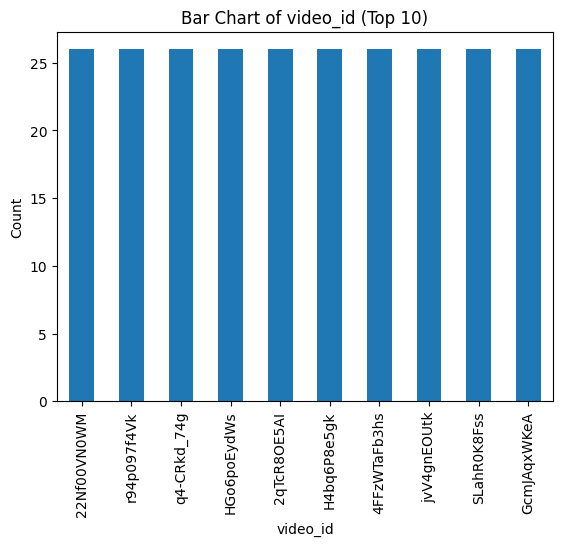

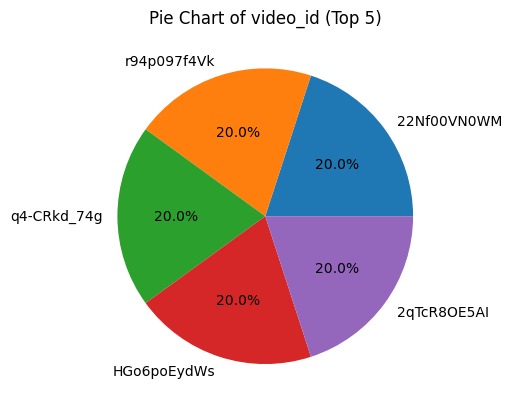

🔹 Insights:
- Dataset has 376 rows and 15 columns.
- Missing values filled with mean (numeric only).
- Mean, Median, Mode, Min, Max, Std computed for numeric data.
- Visualizations show distribution of numeric + categorical columns.


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# Load Dataset (Safe Loader)
# -------------------------------
file_name = "Youtube Data.csv"

try:
    # engine="python" handles messy CSV better
    df = pd.read_csv(file_name, engine="python", on_bad_lines="skip")
    print("✅ Dataset loaded successfully\n")
except FileNotFoundError:
    print(f"❌ File '{file_name}' not found.")
    df = pd.DataFrame()
except pd.errors.ParserError as e:
    print("❌ ParserError:", e)
    df = pd.DataFrame()

# If dataset is empty, stop
if df.empty:
    print("⚠️ No data to analyze. Please check your CSV file.")
else:
    # -------------------------------
    # First Look
    # -------------------------------
    print("First 5 rows:")
    print(df.head(), "\n")

    print("Dataset Shape:", df.shape, "\n")

    # -------------------------------
    # Missing Values
    # -------------------------------
    print("Missing Values:")
    print(df.isnull().sum(), "\n")

    # Fill missing numeric values with mean
    df.fillna(df.mean(numeric_only=True), inplace=True)

    # -------------------------------
    # Statistics
    # -------------------------------
    print("Basic Statistics:\n", df.describe(), "\n")
    print("Median:\n", df.median(numeric_only=True), "\n")
    print("Mode:\n", df.mode().iloc[0], "\n")
    print("Standard Deviation:\n", df.std(numeric_only=True), "\n")

    # -------------------------------
    # Visualizations
    # -------------------------------
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    cat_cols = df.select_dtypes(include=['object']).columns

    # Histogram
    if len(numeric_cols) > 0:
        col = numeric_cols[0]
        plt.hist(df[col], bins=20, edgecolor='black')
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

        # Line Plot
        plt.plot(df[col].head(50))
        plt.title(f'Line Plot of first 50 values in {col}')
        plt.xlabel('Index')
        plt.ylabel(col)
        plt.show()

    # Bar Chart
    if len(cat_cols) > 0:
        col = cat_cols[0]
        df[col].value_counts().head(10).plot(kind='bar')
        plt.title(f'Bar Chart of {col} (Top 10)')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()

        # Pie Chart
        df[col].value_counts().head(5).plot(kind='pie', autopct='%1.1f%%')
        plt.title(f'Pie Chart of {col} (Top 5)')
        plt.ylabel('')
        plt.show()

    # -------------------------------
    # Insights
    # -------------------------------
    print("🔹 Insights:")
    print(f"- Dataset has {df.shape[0]} rows and {df.shape[1]} columns.")
    print("- Missing values filled with mean (numeric only).")
    print("- Mean, Median, Mode, Min, Max, Std computed for numeric data.")
    print("- Visualizations show distribution of numeric + categorical columns.")